Import Libraries

In [12]:
import numpy as np
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model, to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt

Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

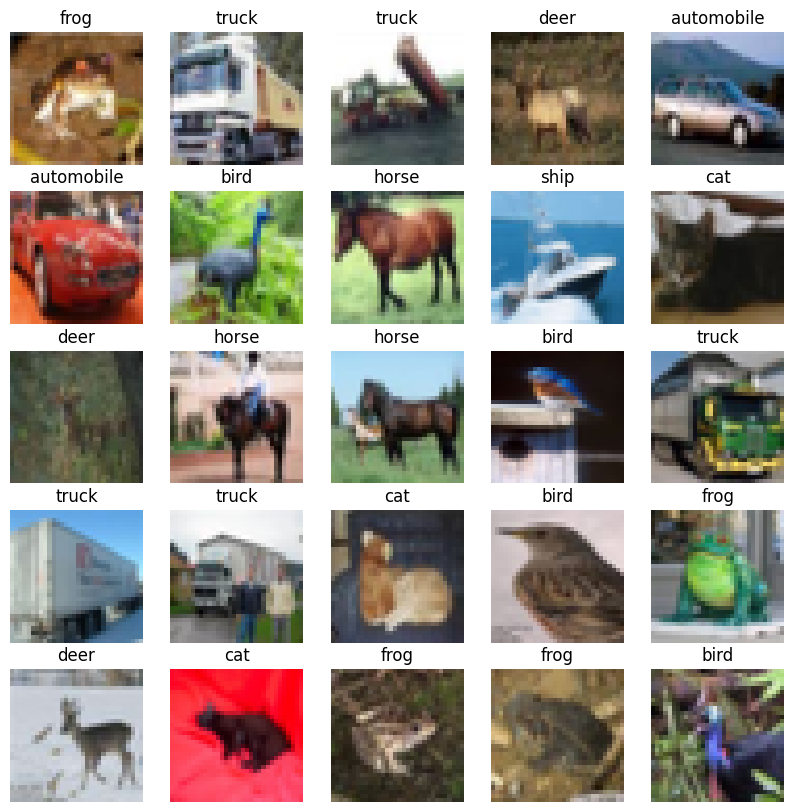

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i])
  plt.title(labels[y_train[i][0]])
  plt.axis('off')

Scale the Data

In [11]:
X_train = X_train/255
X_test = X_test/255

Build the Model

In [15]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (3, 3),
                 activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters= 16, kernel_size= (3, 3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 576)              

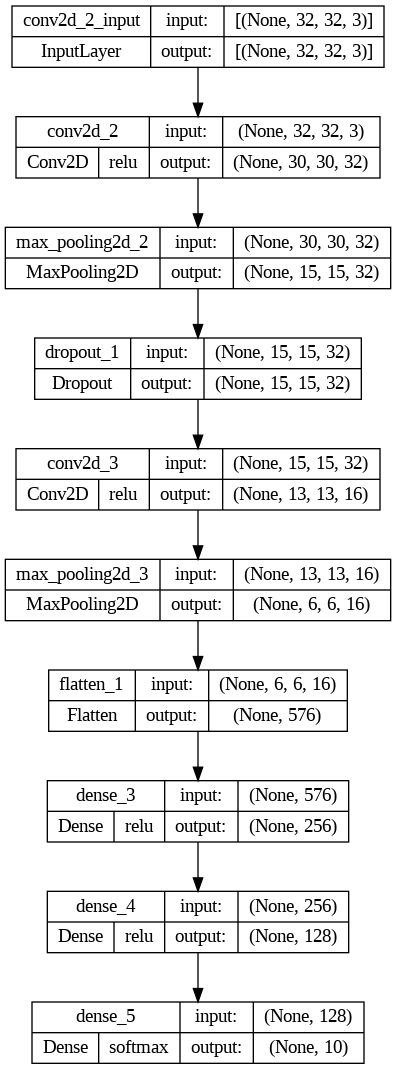

In [18]:
plot_model(model, show_layer_activations= True, show_layer_names= True, show_shapes= True)

Compile model

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the Model

In [24]:
model.fit(X_train, y_train, epochs= 10, batch_size= 10)

Epoch 1/10
5000/5000 [==============================] - 73s 15ms/step - loss: 1.1864 - accuracy: 0.5797
Epoch 2/10
5000/5000 [==============================] - 72s 14ms/step - loss: 1.0202 - accuracy: 0.6385
Epoch 3/10
5000/5000 [==============================] - 71s 14ms/step - loss: 0.9087 - accuracy: 0.6800
Epoch 4/10
5000/5000 [==============================] - 72s 14ms/step - loss: 0.8282 - accuracy: 0.7088
Epoch 5/10
5000/5000 [==============================] - 72s 14ms/step - loss: 0.7620 - accuracy: 0.7314
Epoch 6/10
5000/5000 [==============================] - 72s 14ms/step - loss: 0.6985 - accuracy: 0.7520
Epoch 7/10
5000/5000 [==============================] - 73s 15ms/step - loss: 0.6507 - accuracy: 0.7690
Epoch 8/10
5000/5000 [==============================] - 72s 14ms/step - loss: 0.6114 - accuracy: 0.7822
Epoch 9/10
5000/5000 [==============================] - 83s 17ms/step - loss: 0.5688 - accuracy: 0.7979
Epoch 10/10
5000/5000 [==============================] - 75s 15m

Evaluate Test Data

In [25]:
model.evaluate(X_test, y_test, batch_size= 1)

10000/10000 [==============================] - 23s 2ms/step - loss: 1.1348 - accuracy: 0.6675


[1.1348053216934204, 0.6675000190734863]

Test on new data

In [26]:
import cv2

In [29]:
new = cv2.imread('car.png')
new = cv2.resize(new, (32, 32))
new = new.reshape(1, 32, 32, 3)
new = new/255
new

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [32]:
y_pred = model.predict(new, batch_size=1)
labels[np.argmax(y_pred)]

1/1 [==============================] - 0s 19ms/step


'automobile'